In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Visualize the data

In [7]:
# find which variable is related

import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


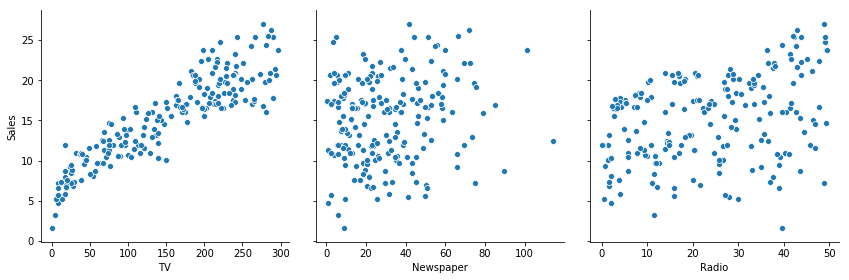

In [8]:
sns.pairplot(advertising, x_vars=['TV','Newspaper','Radio'],y_vars='Sales',size=4, aspect=1)
plt.show()

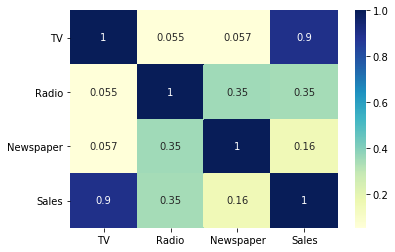

In [10]:
sns.heatmap(advertising.corr(),cmap='YlGnBu',annot = True)
plt.show()

# Performing a simple linear regression

In [11]:
X=advertising['TV']
y=advertising['Sales']

In [12]:
## Train test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size=0.3)

In [13]:
X_train.head()

86      76.3
73     129.4
111    241.7
168    215.4
165    234.5
Name: TV, dtype: float64

In [14]:
y_train.head()

86     12.0
73     11.0
111    21.8
168    17.1
165    16.9
Name: Sales, dtype: float64

In [15]:
# Build a model

In [16]:
import statsmodels.api as sm

In [17]:
# Add a constant to get an intercept
X_train_sm=sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr=sm.OLS(y_train, X_train_sm).fit()

In [18]:
# Intercept and slope
lr.params

const    7.008266
TV       0.055959
dtype: float64

In [20]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     588.9
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           1.22e-51
Time:                        18:19:38   Log-Likelihood:                -316.86
No. Observations:                 140   AIC:                             637.7
Df Residuals:                     138   BIC:                             643.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0083      0.391     17.903      0.0

In [25]:
#Predicted value of 'Y'
#Sales= 7.0082+0.0559x TV

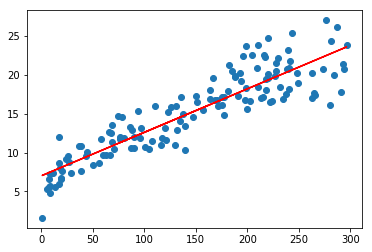

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.0082+0.0559*X_train,'r')
plt.show()

In [26]:
# Residual Analysis
#Plot the histogram of error terms

In [27]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

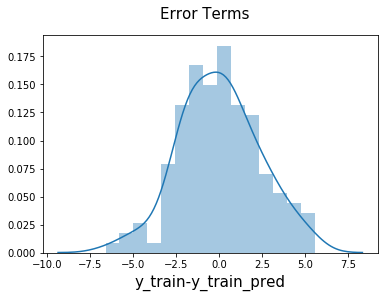

In [28]:
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle('Error Terms',fontsize = 15)
plt.xlabel('y_train-y_train_pred',fontsize = 15)
plt.show()

In [29]:
#Looking for patterns in the residuals

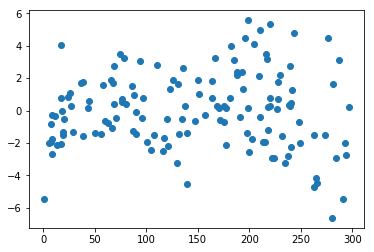

In [30]:
plt.scatter(X_train,res)
plt.show()

# Predictions on the test set

In [31]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [32]:
y_pred.head()

157    15.390925
178    22.492122
71     13.152564
82     11.221979
181    19.235308
dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.19235987255731

In [35]:
#Looking at r2 on test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.8153994752883801

In [36]:
# Visualizing the fit on the test set

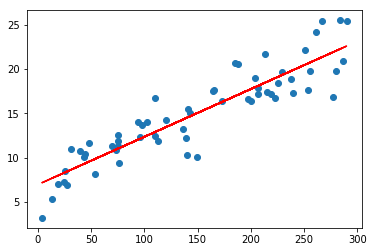

In [37]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054* X_test,'r')
plt.show()